Name : J Karan Tejas

Roll No : 191EE126

In [4]:
!pip install control

     |████████████████████████████████| 339 kB 8.6 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=f33106530229250d37deb29ebf31ef308e5822d045b25e80cad35d52aee12e5c
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


In [5]:
import numpy as np
import IPython
from IPython.display import Audio , display, Javascript
import scipy
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks, chirp, spectrogram
import math
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import pandas as pd
import base64
from google.colab import output
import control

# Problem 1

In [6]:
plt.rcParams.update({
    "figure.figsize": (10,10),
    "font.size": 12})

In [7]:
def plot_pole_zero(bd,ad = 1,title = None,savefile = None) :
  zeros, poles, _ = sp.tf2zpk(bd, ad)
  cir = np.arange(0, 2*np.pi, 0.01)
  plt.plot(np.cos(cir), np.sin(cir), 'k.', label='Unit circle')
  plt.plot(np.real(poles), np.imag(poles), 'rX', label='Poles')
  plt.plot(np.real(zeros), np.imag(zeros), 'bo', label='Zeroes')
  plt.legend()
  plt.title(r'Pole-Zero Plot of {}'.format(title),fontsize = 20)
  plt.xlabel(r'$Re\{z\}$',fontsize = 16)
  plt.ylabel(r'$Im\{z\}$',fontsize = 16)
  plt.savefig(savefile)
  plt.figure()

Transfer function H1(z) for Ro = 0.8 
   z
-------
z - 0.8

Transfer function H1(z) for Ro = 1 
  z
-----
z - 1

Transfer function H1(z) for Ro = 1.3 
   z
-------
z - 1.3

Transfer function H1(z) for Ro = 2 
  z
-----
z - 2



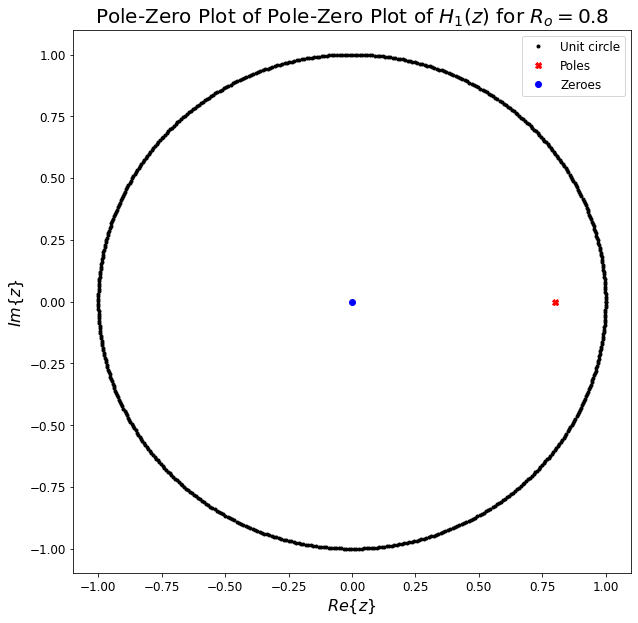

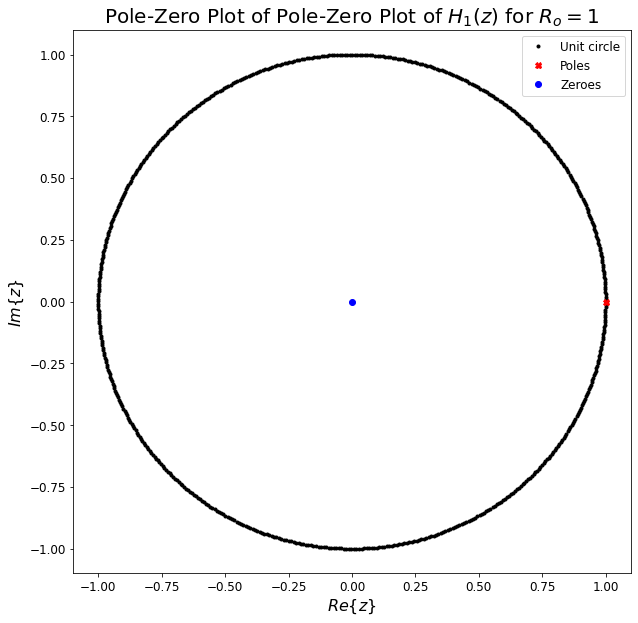

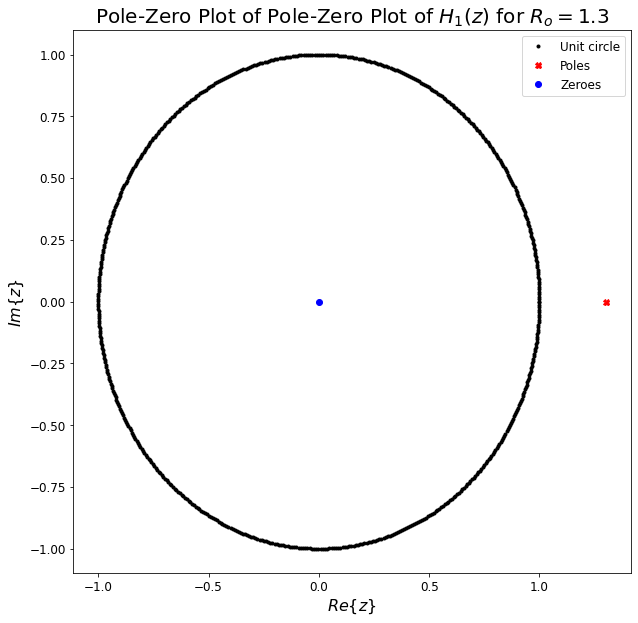

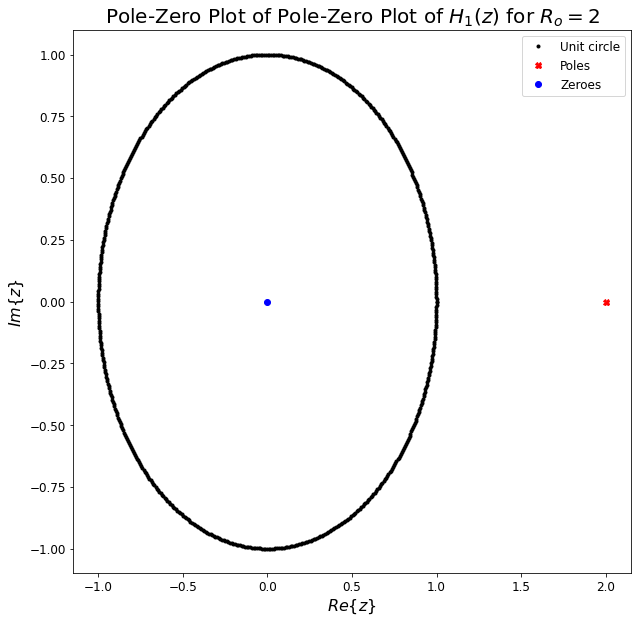

<Figure size 720x720 with 0 Axes>

In [8]:
Ro=[0.8, 1, 1.3, 2]
b=[]
a=[]
for i in range(len(Ro)):
    b = b + [[1, 0]]
    a = a + [[1, -Ro[i]]]
    print('Transfer function H1(z) for Ro = {}'.format(Ro[i]), control.TransferFunction(b[i], a[i], dt=True))
    plot_pole_zero(b[i],a[i],r'Pole-Zero Plot of $H_1(z)$ for $R_o = ${}'.format(Ro[i]),'q1p{}.png'.format(i+1))

In [9]:
plt.rcParams.update({
    "figure.figsize": (15,5),
    "font.size": 12})

In [10]:
def plot_signal(x, y,title = None,llabel = None,xlabel = None,ylabel = None, savfig = None):  
    plt.stem(x,y,label = llabel)
    plt.legend()
    plt.title(title,fontsize = 20)
    plt.xlabel(xlabel,fontsize = 16)
    plt.ylabel(ylabel,fontsize = 16)
    plt.savefig(savfig)
    plt.figure()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warni

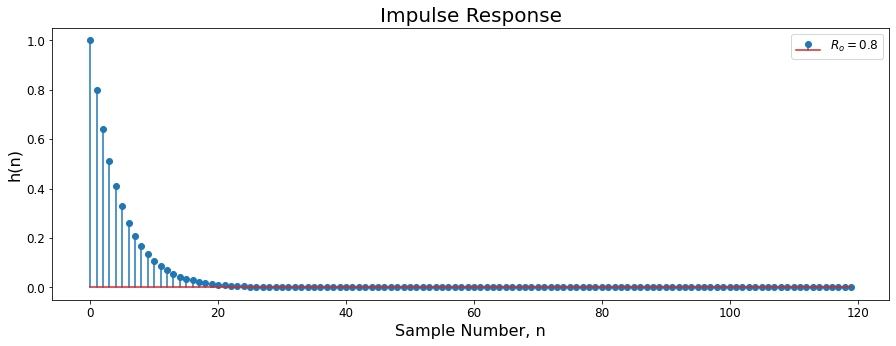

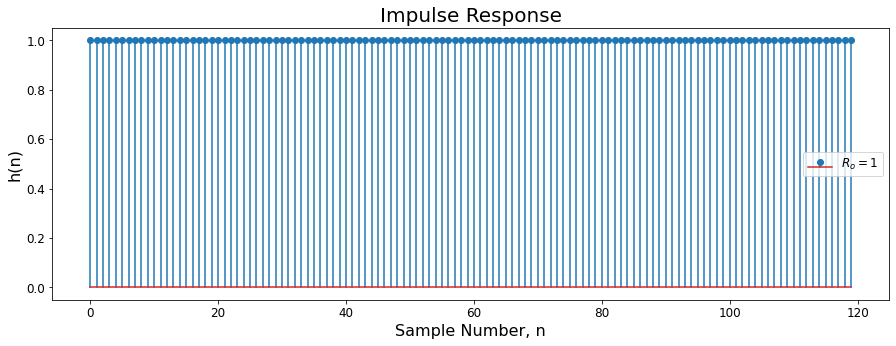

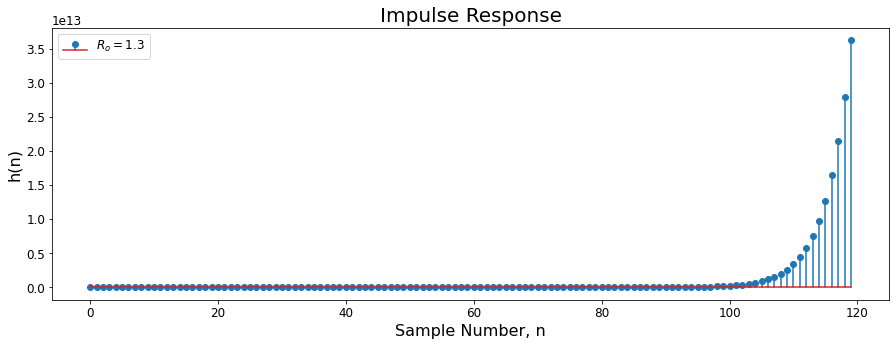

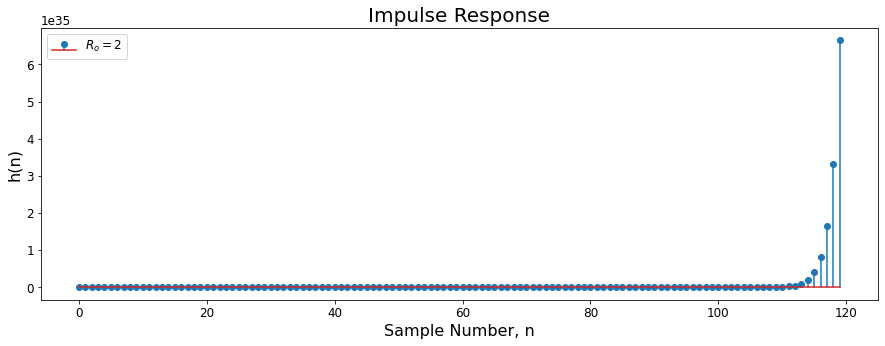

<Figure size 1080x360 with 0 Axes>

In [11]:
n=np.arange(120)
x=np.zeros(120)
x[0]=1
y=[]
for i in range(len(Ro)):
    y.append(sp.lfilter(b[i], a[i], x))
    plot_signal(n , y[i],title = 'Impulse Response',xlabel = 'Sample Number, n', ylabel = 'h(n)', llabel= '$R_o = ${}'.format(Ro[i]),savfig = 'q1p{}.png'.format(i+5))

In [12]:
plt.rcParams.update({
    "figure.figsize": (14,7),
    "font.size": 12})

With Ro = 2.5, Number of days taken to reach 1 million infections = 16
2328306.4365386963


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


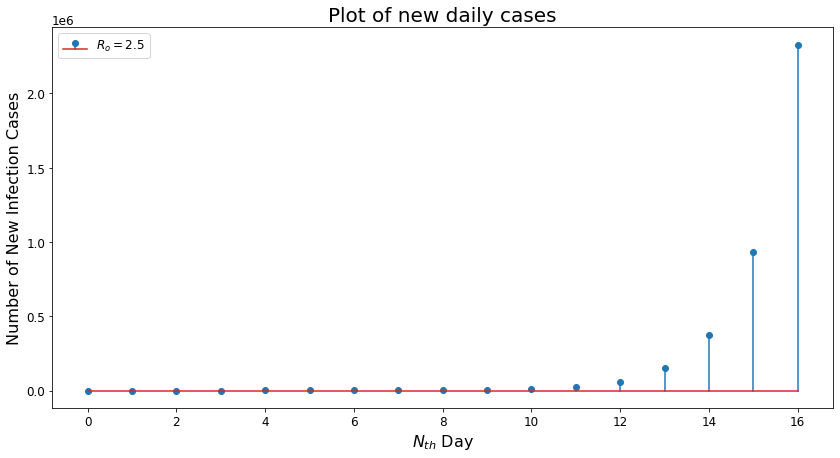

<Figure size 1008x504 with 0 Axes>

In [13]:
x=np.zeros(120)
x[0]=1
Ro=2.5
b=np.array([1, 0])
a=np.array([1, -Ro])
y=sp.lfilter(b, a, x)
for i in range(len(y)):
    if y[i] >= 1000000:
        break
print('With Ro = 2.5, Number of days taken to reach 1 million infections = {}'.format(i))
n=np.arange(i+1)
plot_signal(n , y[0:i + 1],title = 'Plot of new daily cases', xlabel = r'$N_{th}$ Day' , ylabel = 'Number of New Infection Cases' , llabel= '$R_o = 2.5$',savfig = 'q1p9.png')
print(y[i])

In [32]:
data = pd.read_csv('case_time_series.csv')
cases = data['Daily Confirmed']

In [35]:
date = [160, 170, 180, 190, 210, 222]
p = np.zeros(len(date))
for i in range(len(date)):
  p[i] = cases[date[i]]**(1/date[i]) 
  print("Basic Reproduction number on {}th day is {}".format(date[i], p[i]))
P = 0
for i in range(150,240):
  P = P + cases[i]**(1/i)


P = P / (240 - 150)
print('Average reproduction number for  {}'.format(P))

Basic Reproduction number on 160th day is 1.0654850526203
Basic Reproduction number on 170th day is 1.0638980086062
Basic Reproduction number on 180th day is 1.0619095262326053
Basic Reproduction number on 190th day is 1.0597487982499447
Basic Reproduction number on 210th day is 1.0550288891338102
Basic Reproduction number on 222th day is 1.052720919793647
Average reproduction number for  1.0583780814384889


In [14]:
plt.rcParams.update({
    "figure.figsize": (14,7),
    "font.size": 12})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Transfer function of integrator Filter 
  z
-----
z - 1

Total number of infections after 20 days = 60632979


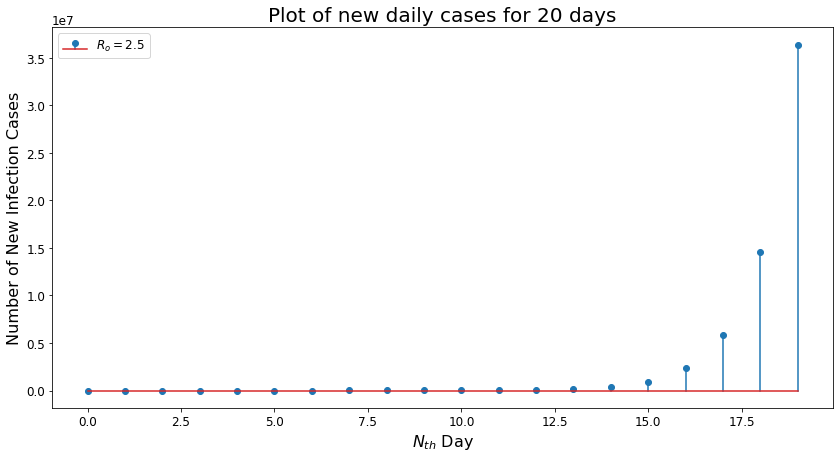

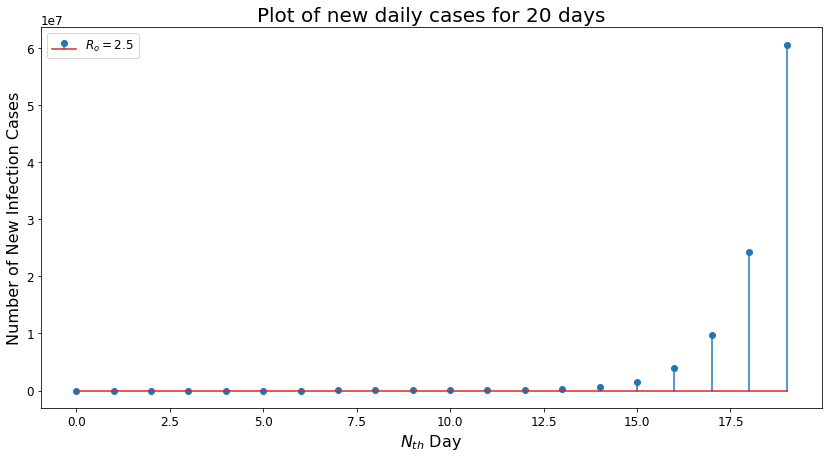

<Figure size 1008x504 with 0 Axes>

In [15]:
x = np.zeros(20)
x[0] = 1
n = np.arange(20)
Ro = 2.5
b=np.array([1, 0])
a=np.array([1, -Ro])
y=sp.lfilter(b, a, x)
plot_signal(n , y,title = 'Plot of new daily cases for 20 days', xlabel = r'$N_{th}$ Day' , ylabel = 'Number of New Infection Cases' , llabel= '$R_o = 2.5$',savfig = 'q1p10.png')

bi = np.array([1, 0])
ai = np.array([1, -1])
print(r'Transfer function of integrator Filter', control.TransferFunction(bi, ai, dt=True))

yc=sp.lfilter(bi, ai, y)
plot_signal(n , yc,title = 'Plot of new daily cases for 20 days', xlabel = r'$N_{th}$ Day' , ylabel = 'Number of New Infection Cases' , llabel= '$R_o = 2.5$',savfig = 'q1p11.png')

print('Total number of infections after 20 days = {}'.format(int(yc[-1])))


# Problem 2

In [16]:
def plot_signal_2(x, y,title = None,clr = None,llabel = None,xlabel = None,ylabel = None):  
    markerline, stemlines, _ = plt.stem(x,y,linefmt=clr,label = llabel)
    plt.setp(stemlines, color=clr)
    plt.setp(markerline, color=clr)
    plt.legend()
    plt.title(title,fontsize = 20)
    plt.xlabel(xlabel,fontsize = 16)
    plt.ylabel(ylabel,fontsize = 16)

Transfer function hm(z):  
                                                             z^12
-------------------------------------------------------------------------------------------------------------------------------
z^12 - 0.1 z^11 - 0.15 z^10 - 0.25 z^9 - 0.26 z^8 - 0.34 z^7 - 0.42 z^6 - 0.25 z^5 - 0.2 z^4 - 0.15 z^3 - 0.1 z^2 - 0.1 z - 0.1

Number of days taken to reach 1 million new daily infections : 94


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


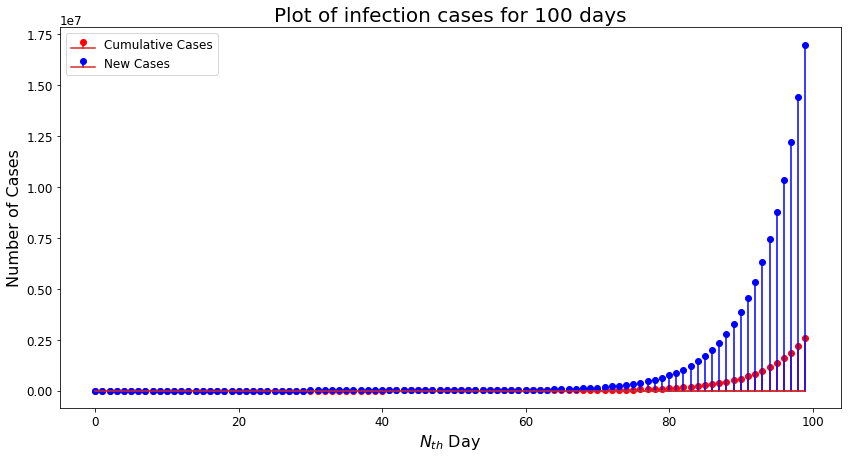

In [17]:
M=12
a_k=np.array([.1, .15, .25, .26, .34, .42, .25, .2, .15, .1, .1, .1])
bm=np.zeros(13)
bm[0]=1
am=np.hstack((np.array([1]), -1*a_k))
print(r'Transfer function hm(z): ', control.TransferFunction(bm, am, dt=True))

n=np.arange(100)
x=np.zeros(100)
x[0]=1
y=sp.lfilter(bm, am, x)
plot_signal_2(n , y,title = 'Plot of infection cases for 100 days', xlabel = r'$N_{th}$ Day' , ylabel = 'Number of Cases' , llabel= 'Cumulative Cases',clr = 'r')
yc=sp.lfilter(bi, ai, y)
plot_signal_2(n , yc,title = 'Plot of infection cases for 100 days', xlabel = r'$N_{th}$ Day' , ylabel = 'Number of Cases' , llabel= 'New Cases',clr = 'b')
plt.legend(loc='upper left')

for i in range(len(y)):
    if y[i]>=1e6:
        break
print(r'Number of days taken to reach 1 million new daily infections : {}'.format(i))
plt.savefig('q2p1.png')

In [18]:
plt.rcParams.update({
    "figure.figsize": (10,10),
    "font.size": 12})

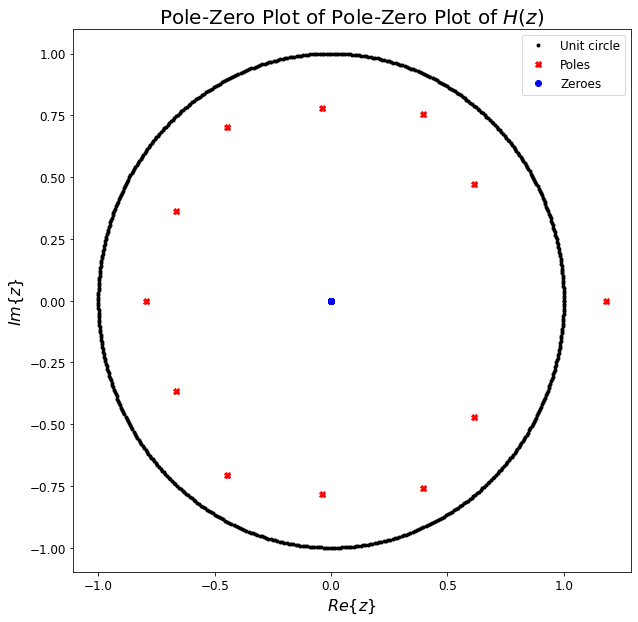

<Figure size 720x720 with 0 Axes>

In [19]:
plot_pole_zero(bm,am,r'Pole-Zero Plot of $H(z)$','q2p2.png'.format(i+1))

# Probem 3

In [20]:
plt.rcParams.update({
    "figure.figsize": (14,7),
    "font.size": 12})

In [21]:
def plot_signal(x, y,title = None,llabel = None,xlabel = None,ylabel = None, savfig = None):  
    plt.stem(x,y,label = llabel)
    plt.legend()
    plt.title(title,fontsize = 20)
    plt.xlabel(xlabel,fontsize = 16)
    plt.ylabel(ylabel,fontsize = 16)
    plt.savefig(savfig)
    plt.figure()

Transfer function hm(z, p):  
                                                             z^12
-------------------------------------------------------------------------------------------------------------------------------
z^12 - 0.1 z^11 - 0.15 z^10 - 0.25 z^9 - 0.26 z^8 - 0.34 z^7 - 0.42 z^6 - 0.25 z^5 - 0.2 z^4 - 0.15 z^3 - 0.1 z^2 - 0.1 z - 0.1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Cumulative Number of infections after 100 days for rho value of  0.25 77744.79764772893
Transfer function hm(z, p):  
                                                             z^12
-------------------------------------------------------------------------------------------------------------------------------
z^12 - 0.1 z^11 - 0.15 z^10 - 0.25 z^9 - 0.26 z^8 - 0.34 z^7 - 0.42 z^6 - 0.25 z^5 - 0.2 z^4 - 0.15 z^3 - 0.1 z^2 - 0.1 z - 0.1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Cumulative Number of infections after 100 days for rho value of  0.5 133.89869375648092
Transfer function hm(z, p):  
                                                             z^12
-------------------------------------------------------------------------------------------------------------------------------
z^12 - 0.1 z^11 - 0.15 z^10 - 0.25 z^9 - 0.26 z^8 - 0.34 z^7 - 0.42 z^6 - 0.25 z^5 - 0.2 z^4 - 0.15 z^3 - 0.1 z^2 - 0.1 z - 0.1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Cumulative Number of infections after 100 days for rho value of  0.75 2.5309944507906685


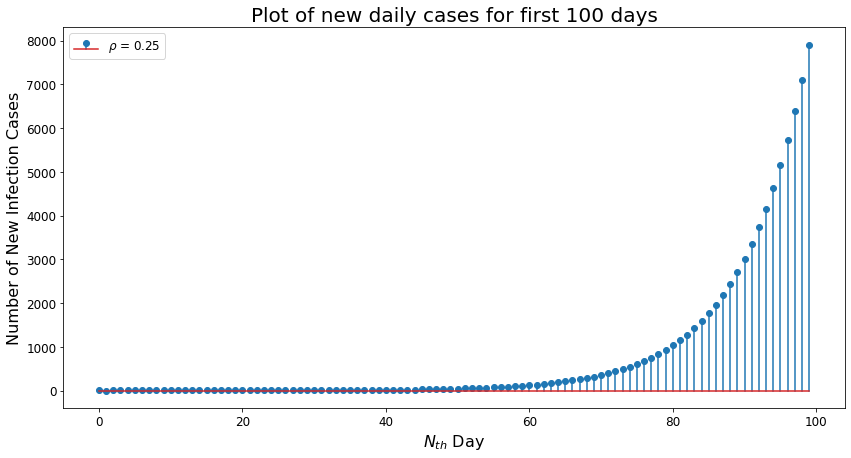

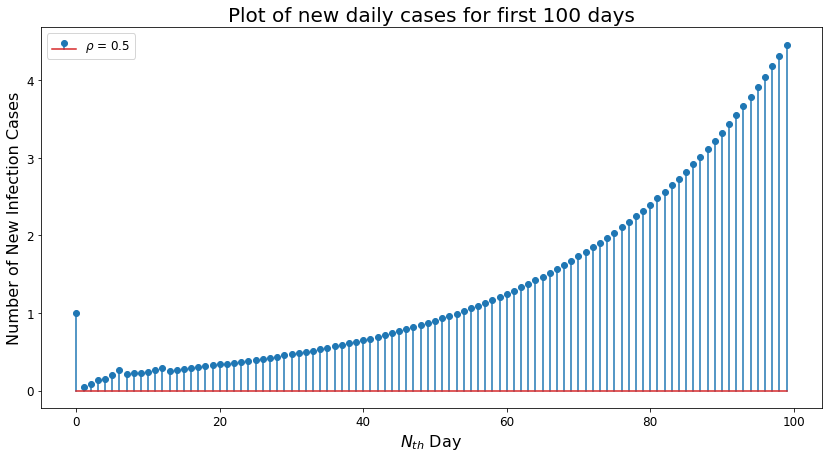

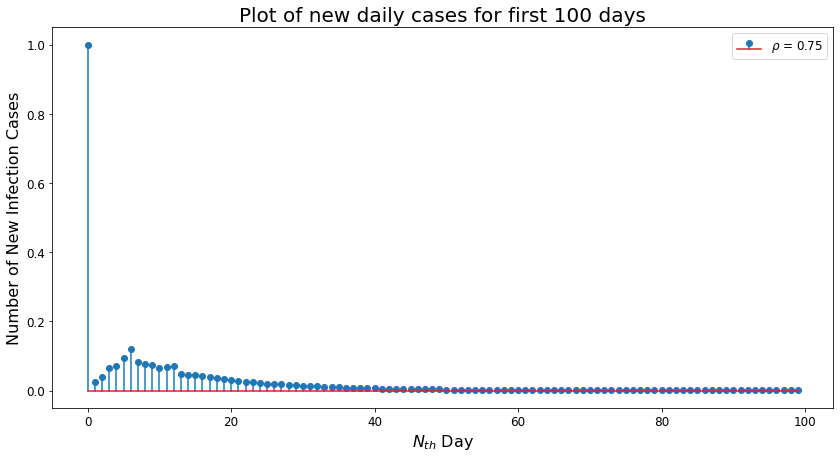

<Figure size 1008x504 with 0 Axes>

In [22]:
M=12
r = [0.25, 0.5, 0.75]
a_k = np.array([.1, .15, .25, .26, .34, .42, .25, .2, .15, .1, .1, .1])
BM = []
AM = []
n=np.arange(100)
x=np.zeros(100)
x[0]=1
y=[]
yc=[]
for i in range(len(r)):
        bm=np.zeros(13)
        bm[0]=1
        BM.append(bm)
        AM.append(np.hstack((np.array([1]), -1*(1 - r[i])*a_k)))
        print(r'Transfer function hm(z, p): ', control.TransferFunction(bm, am, dt=True))
        y.append(sp.lfilter(BM[i], AM[i], x))
        plot_signal(n , y[i],title = 'Plot of new daily cases for first 100 days', xlabel = r'$N_{th}$ Day' , ylabel = 'Number of New Infection Cases' , llabel= r'$\rho$ = {}'.format(r[i]),savfig = 'q3p{}.png'.format(i + 1))
        yc.append(sp.lfilter(bi, ai, y[i]))
        print('Cumulative Number of infections after 100 days for rho value of ', r[i], yc[i][-1])
        

# Problem 4

In [23]:
def plot_signal(x, y,title = None,llabel = None,xlabel = None,ylabel = None, savfig = None):  
    plt.stem(x,y,label = llabel)
    plt.legend()
    plt.title(title,fontsize = 20)
    plt.xlabel(xlabel,fontsize = 16)
    plt.ylabel(ylabel,fontsize = 16)
    plt.savefig(savfig)
    plt.figure()
def sgmd(X,k) :
    return (-1/(X-1))+k/(1 + (X**-(n+1))*(k*(X-1)-X))

First order Transfer Function for Ro = 1.15 
   z
--------
z - 1.15



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


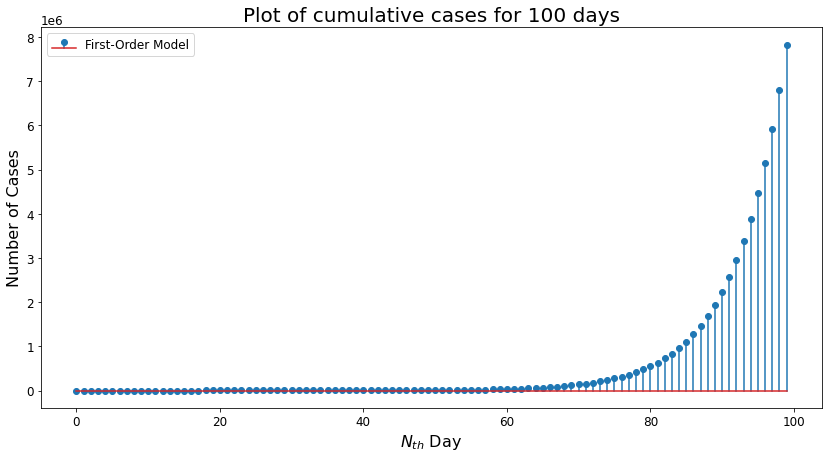

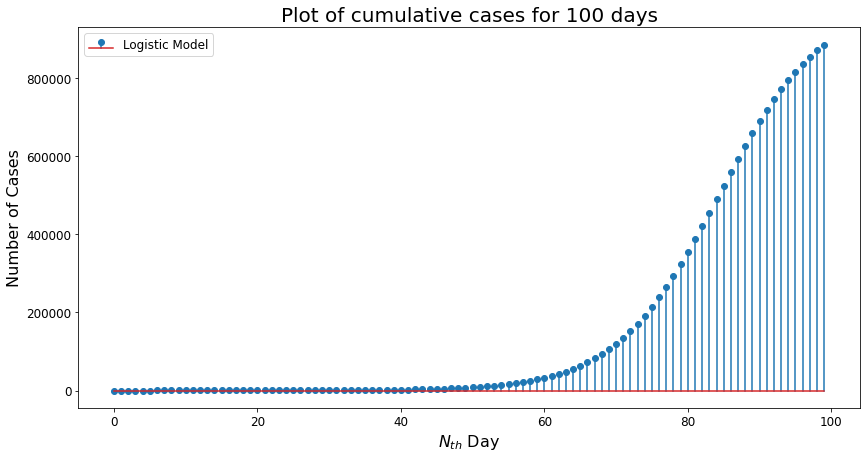

<Figure size 1008x504 with 0 Axes>

In [24]:
k = 1e6
Ro = 1.15
n=np.arange(100)
sig = sgmd(Ro,k)
bf=np.array([1, 0])
af=np.array([1, -Ro])
print('First order Transfer Function for Ro = {}'.format(Ro), control.TransferFunction(bf, af, dt=True))
x=np.zeros(100)
x[0]=1
y=sp.lfilter(bf, af, x)
yc=sp.lfilter(bi, ai, y)
plot_signal(n , yc,title = 'Plot of cumulative cases for 100 days', xlabel = r'$N_{th}$ Day' , ylabel = 'Number of Cases' , llabel= 'First-Order Model',savfig = 'q4p1.png')
plot_signal(n , sig,title = 'Plot of cumulative cases for 100 days', xlabel = r'$N_{th}$ Day' , ylabel = 'Number of Cases' , llabel= 'Logistic Model',savfig = 'q4p2.png')

In [26]:
bfd=np.array([1, -1])
afd=np.array([1, 0])
bsd=np.array([1, -2, 1])
asd=np.array([1, 0, 0])
fd=sp.lfilter(bfd, afd, sig)
sd = sp.lfilter(bsd, asd, sig)
peaks=sp.find_peaks(fd, prominence=0.6)[0]
for i in range(len(sd)):
    if i==0:
        continue
    if i==len(sd)-1:
        break
    else:
        if (s[i-1]>=0 and s[i+1]<=0) or (sd[i-1]<=0 and sd[i+1]>=0):
            break
        else:
            continue
print('Inflection point using global maximum of the first derivative = {}'.format(peaks[0]))
print('Inflection point using zero-crossing of the second derivative = {}'.format(i))

Inflection point using global maximum of the first derivative = 85
Inflection point using zero-crossing of the second derivative = 85
